<a href="https://colab.research.google.com/github/duonghiepit/Depth-Information-Reconstruction-Project/blob/main/Depth_Information_Reconstruction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# 1.Problem 1: Pixel-wise matching

In [54]:
def l1_distance(x, y):
  return abs(x-y)

def l2_distance(x, y):
  return abs(x-y)**2

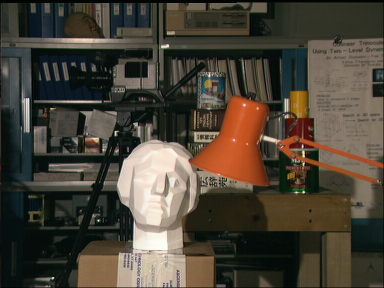

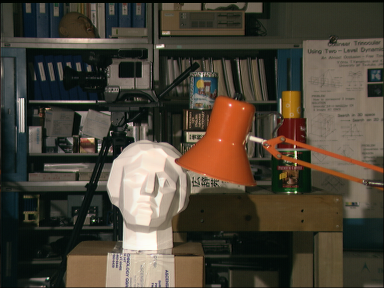

In [55]:
left_img_path = '/content/drive/MyDrive/Aloe/tsukuba/left.png'
right_img_path = '/content/drive/MyDrive/Aloe/tsukuba/right.png'
disparity_range = 16

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

cv2_imshow(left)
cv2_imshow(right)

## L1 distance

In [67]:
def pixel_wise_matching_l1(left_img, right_img, disparity_range, compute_type = 'l1', save_result = True):
  #Đọc ảnh trái và ảnh phải, chuyển sang graysacle
  left = cv2.imread(left_img, 0).astype(np.float32)
  right = cv2.imread(right_img, 0).astype(np.float32)

  height, width = left.shape

  #Tạo disparity map
  depth = np.zeros_like(left).astype(np.uint8)
  scale = 255  / disparity_range
  max_value = 255

  print(f'Compute disparity map using-pixel wise matching with L1 distance...')


  for h in range(height):
    for w in range(width):

      #Tìm i tại đó cost có giá trị min
      disparity = 0
      cost_min = max_value

      for i in range(disparity_range):
        cost = max_value if (w-i<0) else l1_distance(int(left[h, w]), int(right[h, w-i]))

        if cost<cost_min:
          cost_min = cost
          disparity = i

      #Đã tìm được index i của giá trị cost nhỏ nhất (lưu ở biến disparity)
      #Gán i vào disparity_map
      #Nhân với giá trị scale để nhìn cho rõ hơn (không bắt buộc)

      depth[h, w] = disparity*scale

  if save_result == True:
    print('Save result...')
    #Convert từ ndarray sang kiểu image và lưu xuống file
    cv2.imrite(f'pixel_wise_l1_distance.png', depth)
    cv2.imrite(f'pixel_wise_l1_distance_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

  print('Done.')

  return depth

Compute disparity map using-pixel wise matching with L1 distance...
Done.


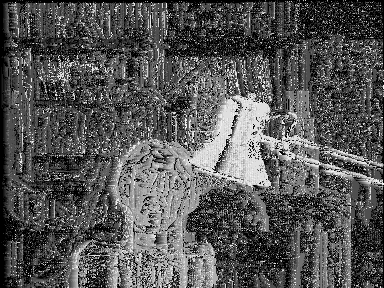

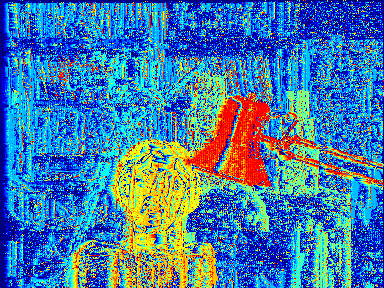

In [68]:
# L1 result
depth = pixel_wise_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=False
)
cv2_imshow(depth)
depth_color = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
cv2_imshow(depth_color)

## L2 distance

In [71]:
def pixel_wise_matching_l2(left_img, right_img, disparity_range, compute_type = 'l1', save_result = True):
  #Đọc ảnh trái và ảnh phải, chuyển sang graysacle
  left = cv2.imread(left_img, 0).astype(np.float32)
  right = cv2.imread(right_img, 0).astype(np.float32)

  height, width = left.shape

  #Tạo disparity map
  depth = np.zeros_like(left).astype(np.uint8)
  scale = 255  / disparity_range
  max_value = 255**2

  print(f'Compute disparity map using-pixel wise matching with L2 distance...')


  for h in range(height):
    for w in range(width):

      #Tìm i tại đó cost có giá trị min
      disparity = 0
      cost_min = max_value

      for i in range(disparity_range):
        cost = max_value if (w-i<0) else l2_distance(int(left[h, w]), int(right[h, w-i]))

        if cost<cost_min:
          cost_min = cost
          disparity = i

      #Đã tìm được index i của giá trị cost nhỏ nhất (lưu ở biến disparity)
      #Gán i vào disparity_map
      #Nhân với giá trị scale để nhìn cho rõ hơn (không bắt buộc)

      depth[h, w] = disparity*scale

  if save_result == True:
    print('Save result...')
    #Convert từ ndarray sang kiểu image và lưu xuống file
    cv2.imrite(f'pixel_wise_l2_distance.png', depth)
    cv2.imrite(f'pixel_wise_l2_distance_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

  print('Done.')

  return depth

Compute disparity map using-pixel wise matching with L2 distance...
Done.


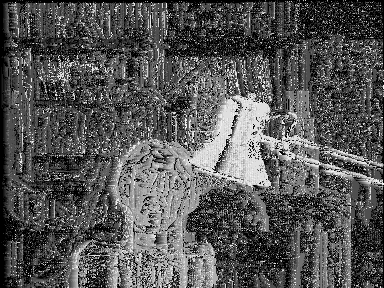

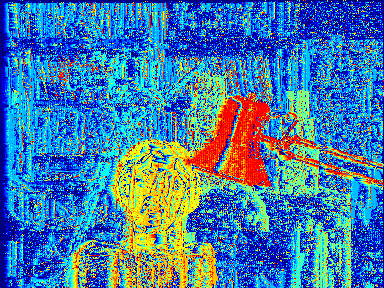

In [72]:
# L2 result
depth = pixel_wise_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=False
)
cv2_imshow(depth)
depth_color = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
cv2_imshow(depth_color)



---

# 2.Problem 2: Window-based matching

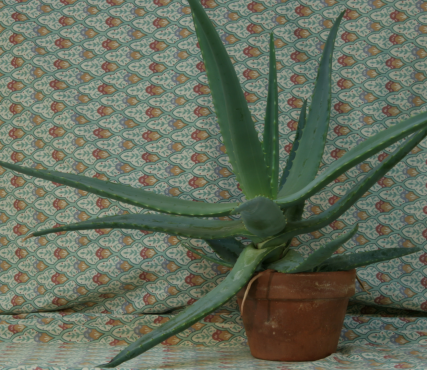

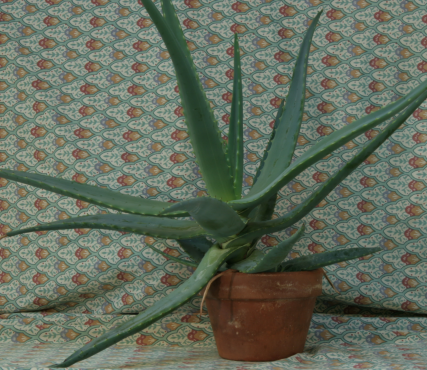

In [77]:
left_img_path = '/content/drive/MyDrive/Aloe/Aloe_left_1.png'
right_img_path = '/content/drive/MyDrive/Aloe/Aloe_right_1.png'
disparity_range = 16

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

cv2_imshow(left)
cv2_imshow(right)

## 2.1. L1 distance

In [78]:
def window_based_matching_L1(left_img, right_img, disparity_range, kernel_size = 3, save_result = True):
  # đọc ảnh trái và ảnh phải, rồi chuyển sang ảnh grayscale
  left = cv2.imread(left_img, 0).astype(np.float32)
  right = cv2.imread(right_img, 0).astype(np.float32)
  height, width = left.shape

  print(f'Compute disparity map using window-based matching with L1_distance...')

  # tạo disparity map
  depth = np.zeros_like(left).astype(np.uint8)
  scale = 255 / disparity_range
  max_value = 255*9

  if kernel_size%2!=0:
    kernel_half = int((kernel_size-1)/2)
  else:
    print('Kernel size must odd integer number!')
    return

  for h in range(kernel_half, height - kernel_half):
        for w in range(kernel_half, width - kernel_half):
            # Find j where cost has minimum value
            disparity = 0
            cost_min  = max_value

            for i in range(disparity_range):
                total = 0
                value = 0

                for u in range(-kernel_half, kernel_half + 1):
                    for v in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (w + v - i) >= 0:
                            value = l1_distance(
                                int(left[h + u, w + v]), int(right[h + u, (w + v) - i]))
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = i

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[h, w] = disparity * scale
  if save_result == True:
    print('Saving result...')

    cv2.imwrite(f'window_based_matching_L1_distance_gray_scale.png', depth)
    cv2.imwrite(f'window_based_matching_L1_distance_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
    print('Done.')

  return depth

In [87]:
depth = window_based_matching_L1(left_img_path, right_img_path, 16, 3, False)
depth

Compute disparity map using window-based matching with L1_distance...


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,  15, ..., 239, 239,   0],
       [  0,   0,  15, ..., 239, 239,   0],
       ...,
       [  0,   0,   0, ..., 223, 239,   0],
       [  0,   0,   0, ..., 223, 239,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

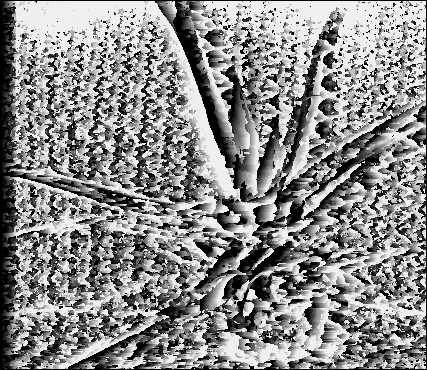

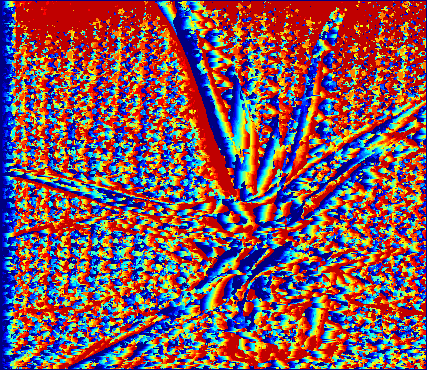

In [88]:
cv2_imshow(depth)
depth_color = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
cv2_imshow(depth_color)

## 2.2. L2 distance

In [97]:
def window_based_matching_L2(left_img, right_img, disparity_range, kernel_size = 3, save_result = True):
  # đọc ảnh trái và ảnh phải, rồi chuyển sang ảnh grayscale
  left = cv2.imread(left_img, 0).astype(np.float32)
  right = cv2.imread(right_img, 0).astype(np.float32)
  height, width = left.shape

  print(f'Compute disparity map using window-based matching with L2_distance...')

  # tạo disparity map
  depth = np.zeros_like(left).astype(np.uint8)
  scale = 255 / disparity_range
  max_value = (255**2)*9

  if kernel_size%2!=0:
    kernel_half = int((kernel_size-1)/2)
  else:
    print('Kernel size must odd integer number!')
    return

  for h in range(kernel_half, height - kernel_half):
        for w in range(kernel_half, width - kernel_half):
            # Find j where cost has minimum value
            disparity = 0
            cost_min  = max_value

            for i in range(disparity_range):
                total = 0
                value = 0

                for u in range(-kernel_half, kernel_half + 1):
                    for v in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (w + v - i) >= 0:
                            value = l2_distance(
                                int(left[h + u, w + v]), int(right[h + u, (w + v) - i]))
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = i

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[h, w] = disparity * scale
  if save_result == True:
    print('Saving result...')

    cv2.imwrite(f'window_based_matching_L1_distance_gray_scale.png', depth)
    cv2.imwrite(f'window_based_matching_L1_distance_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
    print('Done.')

  return depth

In [98]:
depth = window_based_matching_L2(left_img_path, right_img_path, 16, 3, False)
depth

Compute disparity map using window-based matching with L2_distance...


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,  15, ..., 239, 239,   0],
       [  0,   0,  15, ..., 239, 239,   0],
       ...,
       [  0,   0,  15, ..., 223, 239,   0],
       [  0,   0,   0, ..., 223, 239,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

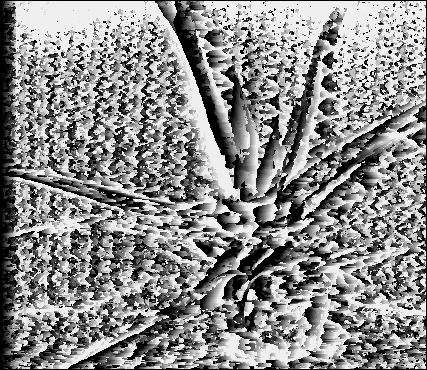

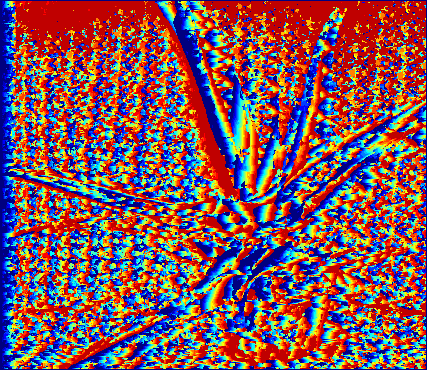

In [99]:
cv2_imshow(depth)
depth_color = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
cv2_imshow(depth_color)



---


# 3.Problem 3

In [100]:
img_l1 = '/content/drive/MyDrive/Aloe/Aloe_left_1.png'
img_r2 = '/content/drive/MyDrive/Aloe/Aloe_right_2.png'

## 3.1. L1 distance

In [101]:
depth_p3 = window_based_matching_L1(img_l1, img_r2, 64, 3, False)
depth_p3

Compute disparity map using window-based matching with L1_distance...


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 63, 67,  0],
       [ 0,  0,  0, ..., 51, 55,  0],
       ...,
       [ 0,  0,  3, ..., 19, 23,  0],
       [ 0,  0,  3, ...,  0,  3,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

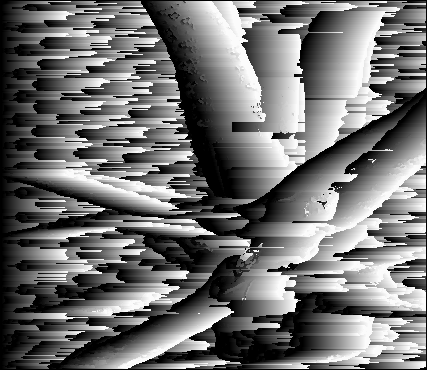

In [102]:
cv2_imshow(depth_p3)

## 3.2. L2 distance

In [103]:
depth_p3 = window_based_matching_L2(img_l1, img_r2, 64, 3, False)
depth_p3

Compute disparity map using window-based matching with L2_distance...


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 63, 67,  0],
       [ 0,  0,  0, ..., 59, 63,  0],
       ...,
       [ 0,  0,  3, ..., 19, 23,  0],
       [ 0,  0,  3, ...,  0,  3,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

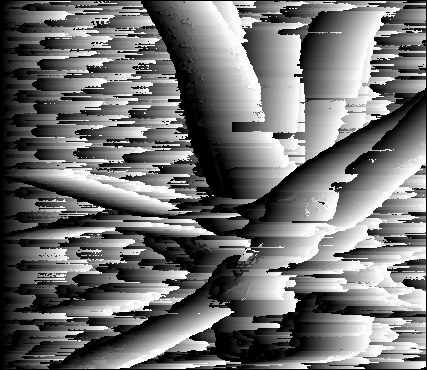

In [104]:
cv2_imshow(depth_p3)



---

# 4.Problem 4

In [115]:
def cosine_similarity(x, y):
  scalar = np.dot(x, y)
  norm_x = np.linalg.norm(x)
  norm_y = np.linalg.norm(y)
  return scalar / (norm_x * norm_y)

In [116]:
x = np.array([1, 2])
y = np.array([3, 4])

cosine_similarity(x, y)

0.9838699100999074

In [147]:
def window_based_matching_CS(left_img, right_img, disparity_range, kernel_size = 3, save_result = True):
  left = cv2.imread(left_img, 0).astype(np.float32)
  right = cv2.imread(right_img, 0).astype(np.float32)

  height, width = left.shape

  #Create blank disparity map
  depth = np.zeros_like(left).astype(np.uint8)
  kernel_half = int((kernel_size-1)/2)
  scale = 255/disparity_range

  print(f'Compute disparity map using window-based matching with Cosine...')

  for h in range(kernel_half, height-kernel_half):
    for w in range(kernel_half, width-kernel_half):
      disparity = 0
      cost_optimal = -1

      for i in range(disparity_range):
        optimal = cost_optimal
        if (w-i-kernel_half>0):
          vec_left = left[(h-kernel_half):(h+kernel_half)+1, (w-kernel_half):(w+kernel_half)+1].flatten()
          vec_right = right[(h-kernel_half):(h+kernel_half)+1, ((w-i)-kernel_half):((w-i)+kernel_half)+1].flatten()

          optimal = cosine_similarity(vec_left, vec_right)

        if optimal>cost_optimal:
          cost_optimal = optimal
          disparity = i

      depth[h, w] = disparity * scale

  if save_result == True:
    cv2.imwrite('window_based_matching_CS_grayscale.png', depth)
    cv2.imwrite('window_based_matching_CS_color', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

  print('Done')
  return depth

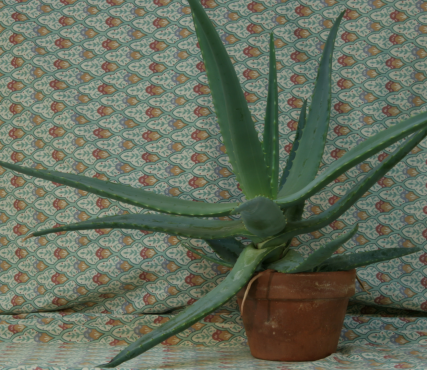

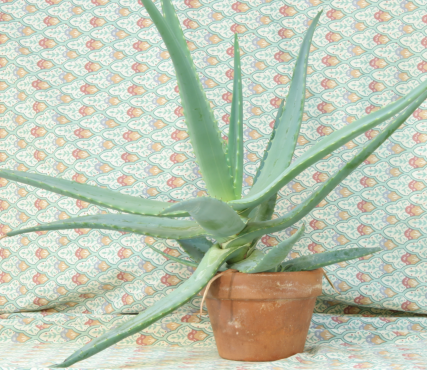

In [150]:
disparity_range = 64
kernel_size = 5

left = cv2.imread(img_l1)
right = cv2.imread(img_r2)

cv2_imshow(left)
cv2_imshow(right)

In [152]:
depth_p4 = window_based_matching_CS(img_l1, img_r2, 64, 7, False)
depth_p4

Compute disparity map using window-based matching with Cosine...
Done


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

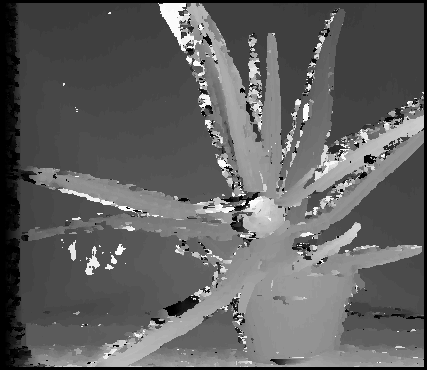

In [153]:
cv2_imshow(depth_p4)